In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = [7.98, 10.82, 15.88, 17.00, 24.22, 12.20, 8.17, 16.53, 7.46, 14.31, 34.55, 19.46, 20.21, 13.58, 10.98, 4.42, 24.92, 30.29, 23.45, 23.36]

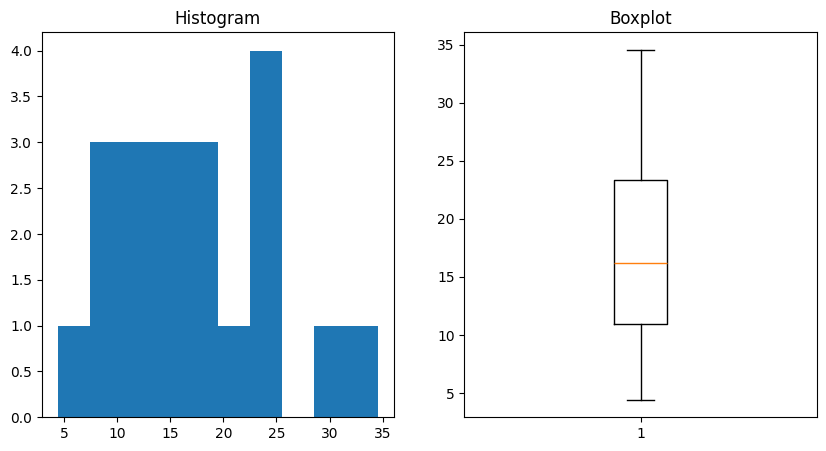

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram
axs[0].hist(X)
axs[0].set_title('Histogram')

# Plot boxplot
axs[1].boxplot(X)
axs[1].set_title('Boxplot')

plt.show()

Hvis r var 12.5 i fjor vil jeg påstå at det er grunnlag for å anta at r har økt ettersom medianen i boksplottet er godt over 15 og nederste del av 25% kvartilen er over 12.5. Dette er en enkel måte å se at r har økt på.

In [7]:
r0 = 12.5
n = 20
a = 5
alpha = 0.10

$$ H_{0}: \mu = 12.5 $$
$$ H_{1}: \mu > 12.5 $$

Vi forkaster nullhypotesen hvis teststørrelsen er større enn $z_{\alpha} = 0.1$

In [9]:
r_hat = sum(X) / n

T_obs = ((r_hat - r0)*np.sqrt(n*a)) / r0
Z_alpha = 1.282

if T_obs >= Z_alpha:
    print("Vi forkaster H0")
else:
    print("Vi beholder H0")

Vi forkaster H0 3.5915999999999997


# Oppgave 3 e

In [68]:
def sim(n):
    R = np.random.gamma(shape=a, scale=(r0/a), size=n)
    r_hat = R.mean()
    T_obs = ((r_hat - r0)*np.sqrt(n*a)) / r0
    
    if T_obs >= Z_alpha:
        return True
    else:
        return False

sim(20)


False

In [73]:
def estimate_type_1_error(m):
    throw_H0 = 0
    for _ in range(m):
        if sim(20):
            throw_H0 += 1

    return throw_H0 / m

estimate_type_1_error(100000)

0.10366

# Oppgave 4

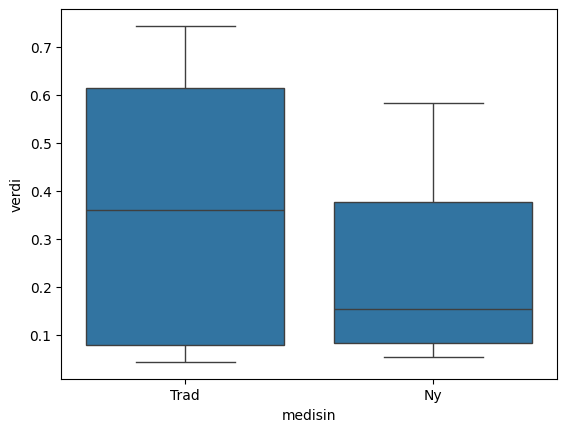

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [0.189,0.743,0.605,0.044,0.091,0.045,0.532,0.642,
     0.397,0.583,0.355,0.054,0.155,0.066,0.099]
data = pd.DataFrame({'verdi': x, 'medisin': 
                     ['Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 
                      'Ny', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny']})

sns.boxplot(x='medisin',y='verdi',data=data)
plt.show()

In [78]:
def testStatistic(x,nTrad):  
    #x inneholder alle observerte verdier, de nTrad 
    #første av disse er for pasienter som som fikk tradisjonell medisin    
    
    #gjennomsnitt av observerte verdier for pasienter som fikk tradisjonell medisin:
    meanTrad = np.mean(x[0:(nTrad+1)])
    #gjennomsnitt av observerte verdier for pasienter som fikk by medisin
    meanNew = np.mean(x[(nTrad):]) 
    
    return meanNew - meanTrad  #returnerer differansen


from random import sample

# regner ut observert verdi av testobservatoren:
statisticObserved = testStatistic(x = x,nTrad = 8)  
print('Observert verdi: ',statisticObserved)

# genererer tilfeldig en permutasjon av (alle) elementene i lista x:
xPermuted = sample(x,len(x))  
# regner ut simulert verdi av testobservatoren
statisticSimulated = testStatistic(xPermuted,8) 
print('Simulert verdi: ',statisticSimulated)

Observert verdi:  -0.12119047619047618
Simulert verdi:  0.11449206349206353


$$H_{0}: \mu_{ny} = \mu_{trad}$$
$$H_{1}: \mu_{ny} < \mu_{trad}$$

In [80]:
import numpy as np
from random import sample

def testStatistic(x, nTrad):
    # x inneholder alle observerte verdier, de nTrad første av disse er for pasienter som fikk tradisjonell medisin    
    # gjennomsnitt av observerte verdier for pasienter som fikk tradisjonell medisin:
    meanTrad = np.mean(x[:nTrad])
    # gjennomsnitt av observerte verdier for pasienter som fikk ny medisin:
    meanNew = np.mean(x[nTrad:]) 
    return meanNew - meanTrad  # returnerer differansen

# Blodprøveverdier
tradisjonell_medisin = [0.189, 0.743, 0.605, 0.044, 0.091, 0.045, 0.532, 0.642]
ny_medisin = [0.397, 0.583, 0.355, 0.054, 0.155, 0.066, 0.099]

# Kombiner alle blodprøveverdiene
x = tradisjonell_medisin + ny_medisin
nTrad = len(tradisjonell_medisin)

# Regner ut observert verdi av testobservatoren:
statisticObserved = testStatistic(x, nTrad)
print('Observert verdi: ', statisticObserved)

# Antall permutasjoner
m = 10000
simulated_statistics = []

np.random.seed(42)  # For replikerbarhet

for _ in range(m):
    xPermuted = sample(x, len(x))
    statisticSimulated = testStatistic(xPermuted, nTrad)
    simulated_statistics.append(statisticSimulated)

simulated_statistics = np.array(simulated_statistics)

# Beregn p-verdi
p_value = np.mean(simulated_statistics <= statisticObserved)

# Skriv ut resultatet
print(f'Estimert p-verdi: {p_value}')


Observert verdi:  -0.11723214285714284
Estimert p-verdi: 0.1941
